## Operations with simplicial complexes

This tutorial will give an overview of the operations possible with simplicial complexes.

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

### Simplical Shifting

In simplical shifting, we apply $\mathbf{H}_k$ to a $k$-simplicial signal $\mathbf{s}^k$, we shift the signal $L$ times over the lower or upper neighbourhoods. Let's go ahead and apply simplicial shifting to a simplical complex.

In [4]:
from pytspl import load_dataset, SCPlot
import matplotlib.pyplot as plt

# load the dataset
sc, coordinates, _ = load_dataset("paper")

# create a plot
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


In [5]:
# create a synthetic flow
synthetic_flow = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In this example, we shift the signal $L_1$ times over the lower neighbourhoods.

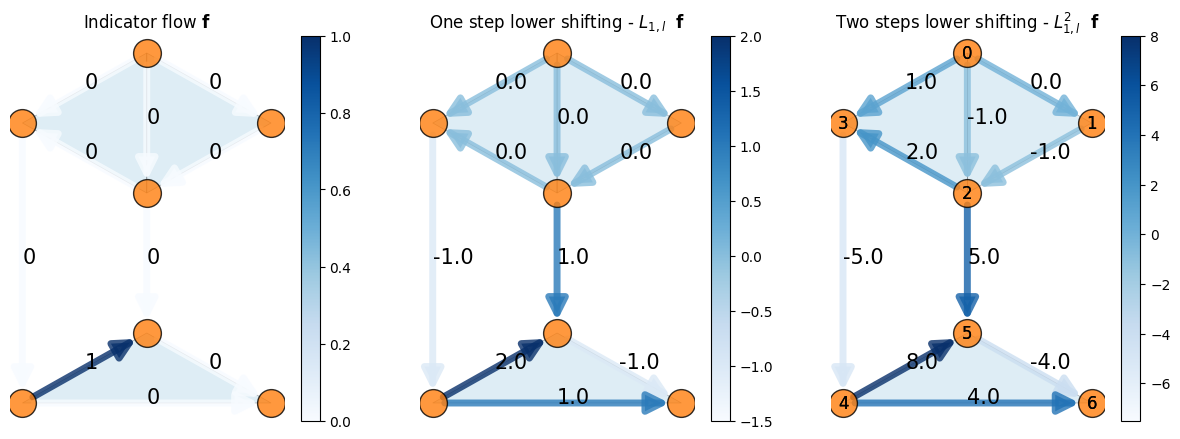

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# indicator flow f
axs[0].set_title("Indicator flow $\mathbf{f}$")
scplot.draw_network(edge_flow=synthetic_flow, ax=axs[0])

# one step lower shifting
steps = 1
flow = sc.apply_lower_shifting(synthetic_flow, steps=steps)

axs[1].set_title(r"One step lower shifting - $L_{1, l} \ \ \mathbf{f}$")
scplot.draw_network(edge_flow=flow, ax=axs[1])

# two steps lower shifting
steps = 2
flow = sc.apply_lower_shifting(synthetic_flow, steps=steps
                               )
axs[2].set_title(r"Two steps lower shifting - $L_{1, l}^2 \ \ \mathbf{f}$")
scplot.draw_network(edge_flow=flow, ax=axs[2])

In this example, we shift the signal $L_2$ times over the upper neighbourhoods.

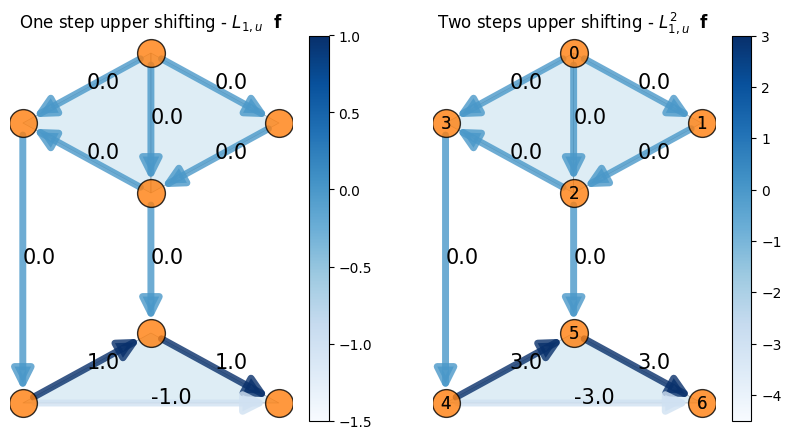

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# one step upper shifting
steps = 1
flow = sc.apply_upper_shifting(synthetic_flow, steps=steps)

axs[0].set_title(r"One step upper shifting - $L_{1, u} \ \ \mathbf{f}$")
scplot.draw_network(edge_flow=flow, ax=axs[0])

# two steps upper shifting
steps = 2
upper_flow = sc.apply_upper_shifting(synthetic_flow, steps=2)

axs[1].set_title(r"Two steps upper shifting - $L_{1, u}^2 \ \ \mathbf{f}$")
scplot.draw_network(edge_flow=upper_flow, ax=axs[1])

We can also apply $k$-step shifting.

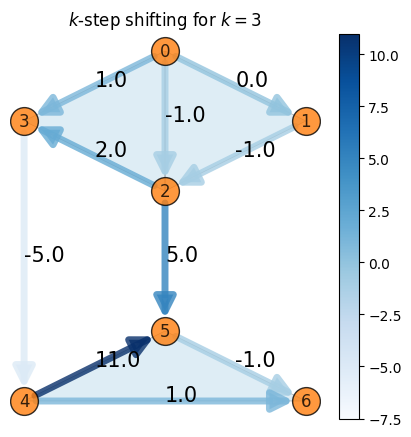

In [8]:
# apply k-step shifting
k = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

flow = sc.apply_k_step_shifting(synthetic_flow)

ax.set_title(r"$k$-step shifting for $k = 3$")
scplot.draw_network(edge_flow=flow, ax=ax)

### Simplical embeddings and SFT

Given a flow $\mathbf{f}$, we can extract the harmonic, curl and gradient embeddings. Such embeddings represent a compressed representation od the edge flow.

The Simplicial Fourier Transform of flow $\mathbf{f}$ can be defined as $\tilde{\mathbf{f}} = \left[ \tilde{\mathbf{f}}_H^\top, \tilde{\mathbf{f}}_G^\top, \tilde{\mathbf{f}}_C^\top \right]^\top$ 



Each of the embedding represents the weight of the flow  on the corresponding eigenvector.

In [9]:
# define a synthetic flow
synthetic_flow = [0.03, 0.5, 2.38, 0.88, -0.53, -0.52, 1.08, 0.47, -1.17, 0.09]

In [10]:
# get the simplicial embeddings for hamonic, curl and gradient
f_tilda_h, f_tilda_c, f_tilda_g = sc.get_simplicial_embeddings(synthetic_flow)

print("embedding_h:", f_tilda_h)
print("embedding_g:", f_tilda_g)
print("embedding_c:", f_tilda_c)

embedding_h: [-1.00084785]
embedding_g: [-1.00061494 -1.00127703  1.00173495 -1.00287539  0.99531105  1.00412064]
embedding_c: [-1.          0.99881597  0.99702056]
